In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import random
import warnings; warnings.simplefilter('ignore')

In [2]:
def EqCons(eps,b):
    c = [{'type': 'eq', 'fun': lambda p: p[0]+p[1]+p[2]+p[3]+p[4]+p[5]+p[6]+p[7]+p[8]+p[9]+p[10]+p[11]+p[12]+p[13]+p[14]+p[15]-math.exp(eps[0]/b)/(math.exp(eps[0]/b)+1)},
         {'type': 'eq', 'fun': lambda p: p[0]+p[1]+p[2]+p[3]+p[4]+p[5]+p[6]+p[7]+p[16]+p[17]+p[18]+p[19]+p[20]+p[21]+p[22]+p[23]-math.exp(eps[1]/b)/(math.exp(eps[1]/b)+1)},
         {'type': 'eq', 'fun': lambda p: p[0]+p[1]+p[2]+p[3]+p[8]+p[9]+p[10]+p[11]+p[16]+p[17]+p[18]+p[19]+p[24]+p[25]+p[26]+p[27]-math.exp(eps[2]/b)/(math.exp(eps[2]/b)+1)},
         {'type': 'eq', 'fun': lambda p: p[0]+p[1]+p[4]+p[5]+p[8]+p[9]+p[12]+p[13]+p[16]+p[17]+p[20]+p[21]+p[24]+p[25]+p[28]+p[29]-math.exp(eps[3]/b)/(math.exp(eps[3]/b)+1)},
         {'type': 'eq', 'fun': lambda p: p[0]+p[2]+p[4]+p[6]+p[8]+p[10]+p[12]+p[14]+p[16]+p[18]+p[20]+p[22]+p[24]+p[26]+p[28]+p[30]-math.exp(eps[4]/b)/(math.exp(eps[4]/b)+1)}]    
    return c

def InEqCons(eps,b):
    c = [{'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[0]-math.exp(eps[4]/b)*p[1]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[0]-math.exp(eps[3]/b)*p[2]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[0]-math.exp(eps[2]/b)*p[4]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[0]-math.exp(eps[1]/b)*p[8]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[0]-math.exp(eps[0]/b)*p[16]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[1]-math.exp(eps[3]/b)*p[3]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[1]-math.exp(eps[2]/b)*p[5]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[1]-math.exp(eps[1]/b)*p[9]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[1]-math.exp(eps[0]/b)*p[17]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[2]-math.exp(eps[4]/b)*p[3]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[2]-math.exp(eps[2]/b)*p[6]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[2]-math.exp(eps[1]/b)*p[10]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[2]-math.exp(eps[0]/b)*p[18]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[3]-math.exp(eps[2]/b)*p[7]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[3]-math.exp(eps[1]/b)*p[11]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[3]-math.exp(eps[0]/b)*p[19]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[4]-math.exp(eps[4]/b)*p[5]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[4]-math.exp(eps[3]/b)*p[6]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[4]-math.exp(eps[1]/b)*p[12]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[4]-math.exp(eps[0]/b)*p[20]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[5]-math.exp(eps[3]/b)*p[7]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[5]-math.exp(eps[1]/b)*p[13]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[5]-math.exp(eps[0]/b)*p[21]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[6]-math.exp(eps[4]/b)*p[7]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[6]-math.exp(eps[1]/b)*p[14]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[6]-math.exp(eps[0]/b)*p[22]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[7]-math.exp(eps[1]/b)*p[15]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[7]-math.exp(eps[0]/b)*p[23]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[8]-math.exp(eps[4]/b)*p[9]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[8]-math.exp(eps[3]/b)*p[10]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[8]-math.exp(eps[2]/b)*p[12]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[8]-math.exp(eps[0]/b)*p[24]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[9]-math.exp(eps[3]/b)*p[11]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[9]-math.exp(eps[2]/b)*p[13]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[9]-math.exp(eps[0]/b)*p[25]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[10]-math.exp(eps[4]/b)*p[11]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[10]-math.exp(eps[2]/b)*p[14]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[10]-math.exp(eps[0]/b)*p[26]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[11]-math.exp(eps[2]/b)*p[15]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[11]-math.exp(eps[0]/b)*p[27]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[12]-math.exp(eps[4]/b)*p[13]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[12]-math.exp(eps[3]/b)*p[14]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[12]-math.exp(eps[0]/b)*p[28]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[13]-math.exp(eps[3]/b)*p[15]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[13]-math.exp(eps[0]/b)*p[29]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[14]-math.exp(eps[4]/b)*p[15]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[14]-math.exp(eps[0]/b)*p[30]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[15]-math.exp(eps[0]/b)*p[31]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[16]-math.exp(eps[4]/b)*p[17]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[16]-math.exp(eps[3]/b)*p[18]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[16]-math.exp(eps[2]/b)*p[20]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[16]-math.exp(eps[1]/b)*p[24]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[17]-math.exp(eps[3]/b)*p[19]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[17]-math.exp(eps[2]/b)*p[21]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[17]-math.exp(eps[1]/b)*p[25]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[18]-math.exp(eps[4]/b)*p[19]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[18]-math.exp(eps[2]/b)*p[22]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[18]-math.exp(eps[1]/b)*p[26]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[19]-math.exp(eps[2]/b)*p[23]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[19]-math.exp(eps[1]/b)*p[27]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[20]-math.exp(eps[4]/b)*p[21]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[20]-math.exp(eps[3]/b)*p[22]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[20]-math.exp(eps[1]/b)*p[28]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[21]-math.exp(eps[3]/b)*p[23]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[21]-math.exp(eps[1]/b)*p[29]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[22]-math.exp(eps[4]/b)*p[23]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[22]-math.exp(eps[1]/b)*p[30]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[23]-math.exp(eps[1]/b)*p[31]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[24]-math.exp(eps[4]/b)*p[25]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[24]-math.exp(eps[3]/b)*p[26]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[24]-math.exp(eps[2]/b)*p[28]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[25]-math.exp(eps[3]/b)*p[27]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[25]-math.exp(eps[2]/b)*p[29]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[26]-math.exp(eps[4]/b)*p[27]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[26]-math.exp(eps[2]/b)*p[30]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[27]-math.exp(eps[2]/b)*p[31]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[28]-math.exp(eps[4]/b)*p[29]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[28]-math.exp(eps[3]/b)*p[30]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[29]-math.exp(eps[3]/b)*p[31]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[30]-math.exp(eps[4]/b)*p[31]},]
    return c

def PrivacyLevel(eps,k,b):
    p0 = np.ones(2**k)*(1/(2**k))
    #print(p0)
    fun = lambda p: p[0]/p[int(2**k-1)]
    
    cons = [0]*(k+1+(2**(k-1))*k)
    cons[0:k] = EqCons(eps,b)
    cons[k] = {'type': 'eq', 'fun': lambda p: np.sum(p)-1}
    cons[k+1:k+1+(2**(k-1))*k] = InEqCons(eps,b)
    #print(cons)

    bnds = [(0,1)]*(2**k)
    
    res = minimize(fun, p0, bounds=bnds, constraints=cons)
    
    prod = 1
    for i in range(k):
        prod *= (math.exp(eps[i])/math.exp(eps[i]/b))
    return math.log(res.fun*prod)

In [3]:
def GPM(t,eps,b):
    D = ((math.exp(eps/b)+1)*(math.exp(eps)+math.exp(eps/b)))/((math.exp(eps)-1)*math.exp(eps/b))
    q = ((math.exp(eps)-1)*math.exp(eps/b))/(2*((math.exp(eps/b)+1)**2))
    L = ((math.exp(eps/b)+1)*math.exp(eps))/((math.exp(eps)-1)*math.exp(eps/b))*t - (math.exp(eps/b)+1)/(math.exp(eps)-1)
    R = ((math.exp(eps/b)+1)*math.exp(eps))/((math.exp(eps)-1)*math.exp(eps/b))*t + (math.exp(eps/b)+1)/(math.exp(eps)-1)
    u = random.uniform(0,1)
    if u < q*(R-L):
        tt = random.uniform(L,R)
    elif u < q*(R-L) + (q/math.exp(eps))*(L+D):
        tt = random.random()*(L+D)-D
    else:
        tt = (1-random.random())*(D-R)+R
    return tt

In [4]:
def accuracy1(k,e,r):
    beps = [10,15,20,25,30,35,40]
    diff = np.zeros((7,4))
    
    for i in range(7):
        for j in range(r):
            t = [((random.random())**(1/3))**(1/2) for l in range(k)]
            eps = [e[j][l]*beps[i]/(sum(e[j])) for l in range(k)]
            for l in range(k):
                diff[i][0] += math.fabs(GPM(t[l],eps[l],2) - t[l])
                diff[i][1] += math.fabs(GPM(t[l],eps[l],1.6) - t[l])
            a = 1
            while(1):
                a += 0.05
                peps = [eps[l]*a for l in range(k)]
                if PrivacyLevel(peps,k,2) > beps[i]:
                    peps = [eps[l]*(a-0.05) for l in range(k)]
                    for l in range(k):
                        diff[i][2] += math.fabs(GPM(t[l],peps[l],2) - t[l])
                    break
            while(1):
                a += 0.05
                gpeps = [eps[l]*a for l in range(k)]
                if PrivacyLevel(gpeps,k,1.6) > beps[i]:
                    gpeps = [eps[l]*(a-0.05) for l in range(k)]
                    for l in range(k):
                        diff[i][3] += math.fabs(GPM(t[l],gpeps[l],1.6) - t[l])
                    break
        diff[i][0] /= (r*k)
        diff[i][1] /= (r*k)
        diff[i][2] /= (r*k)
        diff[i][3] /= (r*k)
    
    return diff

def accuracy2(k,e,r):
    beps = [10,15,20,25,30,35,40]
    diff = np.zeros((7,4))
    
    for i in range(7):
        for j in range(r):
            t = [(1-(random.random())**(1/3))**(1/2) for l in range(k)]
            eps = [e[j][l]*beps[i]/(sum(e[j])) for l in range(k)]
            for l in range(k):
                diff[i][0] += math.fabs(GPM(t[l],eps[l],2) - t[l])
                diff[i][1] += math.fabs(GPM(t[l],eps[l],1.6) - t[l])
            a = 1
            while(1):
                a += 0.05
                peps = [eps[l]*a for l in range(k)]
                if PrivacyLevel(peps,k,2) > beps[i]:
                    peps = [eps[l]*(a-0.05) for l in range(k)]
                    for l in range(k):
                        diff[i][2] += math.fabs(GPM(t[l],peps[l],2) - t[l])
                    break
            while(1):
                a += 0.05
                gpeps = [eps[l]*a for l in range(k)]
                if PrivacyLevel(gpeps,k,1.6) > beps[i]:
                    gpeps = [eps[l]*(a-0.05) for l in range(k)]
                    for l in range(k):
                        diff[i][3] += math.fabs(GPM(t[l],gpeps[l],1.6) - t[l])
                    break
        diff[i][0] /= (r*k)
        diff[i][1] /= (r*k)
        diff[i][2] /= (r*k)
        diff[i][3] /= (r*k)
    
    return diff

def accuracy3(k,e,r):
    beps = [10,15,20,25,30,35,40]
    diff = np.zeros((7,4))
    
    for i in range(7):
        for j in range(r):
            t = [(random.random())**(1/2) for l in range(k)]
            eps = [e[j][l]*beps[i]/(sum(e[j])) for l in range(k)]
            for l in range(k):
                diff[i][0] += math.fabs(GPM(t[l],eps[l],2) - t[l])
                diff[i][1] += math.fabs(GPM(t[l],eps[l],1.6) - t[l])
            a = 1
            while(1):
                a += 0.05
                peps = [eps[l]*a for l in range(k)]
                if PrivacyLevel(peps,k,2) > beps[i]:
                    peps = [eps[l]*(a-0.05) for l in range(k)]
                    for l in range(k):
                        diff[i][2] += math.fabs(GPM(t[l],peps[l],2) - t[l])
                    break
            while(1):
                a += 0.05
                gpeps = [eps[l]*a for l in range(k)]
                if PrivacyLevel(gpeps,k,1.6) > beps[i]:
                    gpeps = [eps[l]*(a-0.05) for l in range(k)]
                    for l in range(k):
                        diff[i][3] += math.fabs(GPM(t[l],gpeps[l],1.6) - t[l])
                    break
        diff[i][0] /= (r*k)
        diff[i][1] /= (r*k)
        diff[i][2] /= (r*k)
        diff[i][3] /= (r*k)
    
    return diff

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


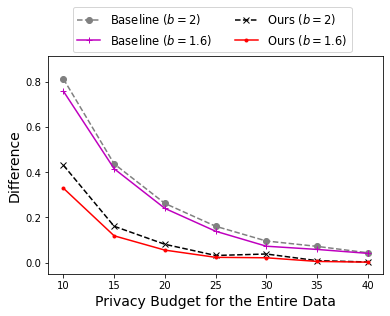

In [5]:
k = 5; r = 50
eps = np.zeros((r,k))
for j in range(r):
    eps[j] = [random.uniform(1,2) for l in range(k)]
    
diff1 = accuracy1(k,eps,r)

s = [10,15,20,25,30,35,40]

fig = plt.figure()
plt.ylim(-0.05, max([max(diff1[:,j]) for j in range(4)])+0.1)
plt.plot(s,diff1[:,0],marker="o",color="gray",linestyle = "dashed",label="Baseline $(b = 2)$")
plt.plot(s,diff1[:,1],marker="+",color="m",linestyle = "-",label="Baseline $(b = 1.6)$")
plt.plot(s,diff1[:,2],marker="x",color="black",linestyle = "dashed",label="Ours $(b = 2)$")
plt.plot(s,diff1[:,3],marker=".",color="red",linestyle = "-",label="Ours $(b = 1.6)$")
plt.legend(bbox_to_anchor=(0.49, 1.02), loc='lower center', borderaxespad=0, ncol=2, fontsize=11.5)
plt.xlabel("Privacy Budget for the Entire Data",fontsize=14)
plt.ylabel("Difference",fontsize=14)
fig.savefig("Accuracy_I.png")
fig.savefig("figs/Accuracy_I.eps", bbox_inches="tight", pad_inches=0.05)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


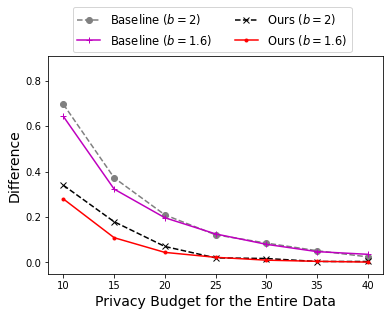

In [6]:
diff2 = accuracy2(k,eps,r)

s = [10,15,20,25,30,35,40]

fig = plt.figure()
plt.ylim(-0.05, max([max(diff1[:,j]) for j in range(4)])+0.1)
plt.plot(s,diff2[:,0],marker="o",color="gray",linestyle = "dashed",label="Baseline $(b = 2)$")
plt.plot(s,diff2[:,1],marker="+",color="m",linestyle = "-",label="Baseline $(b = 1.6)$")
plt.plot(s,diff2[:,2],marker="x",color="black",linestyle = "dashed",label="Ours $(b = 2)$")
plt.plot(s,diff2[:,3],marker=".",color="red",linestyle = "-",label="Ours $(b = 1.6)$")
plt.legend(bbox_to_anchor=(0.49, 1.02), loc='lower center', borderaxespad=0, ncol=2, fontsize=11.5)
plt.xlabel("Privacy Budget for the Entire Data",fontsize=14)
plt.ylabel("Difference",fontsize=14)
fig.savefig("Accuracy_II.png")
fig.savefig("figs/Accuracy_II.eps", bbox_inches="tight", pad_inches=0.05)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


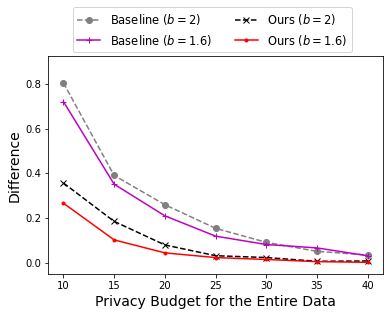

In [7]:
diff3 = accuracy3(k,eps,r)

s = [10,15,20,25,30,35,40]

fig = plt.figure()
plt.ylim(-0.05, max([max(diff1[:,j]) for j in range(4)])+0.1)
plt.plot(s,diff3[:,0],marker="o",color="gray",linestyle = "dashed",label="Baseline $(b = 2)$")
plt.plot(s,diff3[:,1],marker="+",color="m",linestyle = "-",label="Baseline $(b = 1.6)$")
plt.plot(s,diff3[:,2],marker="x",color="black",linestyle = "dashed",label="Ours $(b = 2)$")
plt.plot(s,diff3[:,3],marker=".",color="red",linestyle = "-",label="Ours $(b = 1.6)$")
plt.legend(bbox_to_anchor=(0.49, 1.02), loc='lower center', borderaxespad=0, ncol=2, fontsize=11.5)
plt.xlabel("Privacy Budget for the Entire Data",fontsize=14)
plt.ylabel("Difference",fontsize=14)
fig.savefig("Accuracy_III.png")
fig.savefig("figs/Accuracy_III.eps", bbox_inches="tight", pad_inches=0.05)